### Problem Statement

**Initially:**
To clean and preprocess a Twitter text extract dataset for accurate sentiment analysis in future model development.
Classifying tweets as positive, negative, or neutral based on their sentiment.

**Further:**
To train a Machine Learning model on the cleaned dataset and make predictions which will be used to evaluate the model's performance. 

**Context:**
My final year project is based on an AI mental health chatbot application which will provide appropriate respomses to users based on the percieved sentiment. This will serve as a basis for building the part of the application which can percieve the sentiment of the message (whether users are happy/ sad/ angry/ stressed).

### Part 1:
Reading and exploring the data

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Our column names were missing at the start
column_names = ['ID', 'Topic', 'Sentiment', 'Tweet Content']

# assign column names
data = pd.read_csv('twitter.csv', names=column_names, header=None)

print(data.head(10))



     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   
5  2401  Borderlands  Positive   
6  2402  Borderlands  Positive   
7  2402  Borderlands  Positive   
8  2402  Borderlands  Positive   
9  2402  Borderlands  Positive   

                                       Tweet Content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
5  im getting into borderlands and i can murder y...  
6  So I spent a few hours making something for fu...  
7  So I spent a couple of hours doing something f...  
8  So I spent a few hours doing something for fun...  
9  So I spent a few hours making something for fu...  


In [99]:
data.columns
# Data.columns lists the columns in the dataframe, which we set above

Index(['ID', 'Topic', 'Sentiment', 'Tweet Content'], dtype='object')

In [100]:
# Exploratory data analysis
data.dtypes


ID                int64
Topic            object
Sentiment        object
Tweet Content    object
dtype: object

Our dataset consists of objects, which are in this case strings which will need to be processed into something numerical later on.

In [101]:
data.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             74682 non-null  int64 
 1   Topic          74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


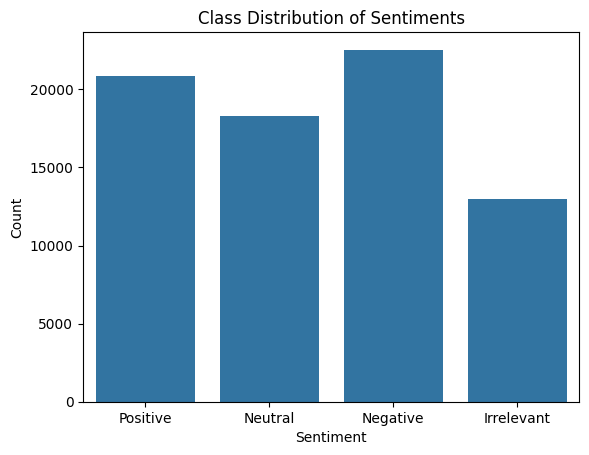

In [103]:
import seaborn as sns

# Class distribution (visualisation of positive, neutral, and negative sentiments)
sns.countplot(x='Sentiment', data=data)
plt.title("Class Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()



## Part 2 ##

Data Cleaning

This step includes identifying rows containing NAN values, duplicate values, and incorrect sentiment values.

In [104]:
rows_with_nan = data[data.isna().any(axis=1)]  # Rows containing NaN 

duplicate_rows = data[data.duplicated(subset=['Tweet Content'], keep='first')]

valid_sentiments = ['positive', 'neutral', 'negative']
invalid_sentiments = data[~data['Sentiment'].isin(valid_sentiments)]

# Combine all filtered rows 
filtered = pd.concat([rows_with_nan, duplicate_rows, invalid_sentiments]).drop_duplicates()

# removing filtered rows and test
data_cleaned = data.drop(filtered.index)

print(data_cleaned.isin(filtered).any().any())  # Should hopefully return False 



False


## Part 3

Preprocessing

1. Converting non-strings to empty strings.
2. Removing URLs, mentions, hashtags, and non-alphabetic characters, which is to remove unnecessary noise in the data.
3. Converting text to lowercase.
4. Removing common stopwords like "a," "the," etc.

This creates a new `Cleaned Tweet` column for cleaned results.


In [105]:
import re

def clean_tweet(tweet):
    # Handle non-string inputs and missing values by converting to an empty string
    if not isinstance(tweet, str):
        tweet = ""
    
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+', '', tweet)
    
    # Remove mentions (@username)
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove hashtags (#hashtag)
    tweet = re.sub(r'#\w+', '', tweet)
    
    # Remove non-alphabetical characters (punctuation, numbers, etc.)
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    
    # Convert text to lowercase
    tweet = tweet.lower()
    
    # Remove stopwords
    stop_words = {'a', 'an', 'the', 'in', 'on', 'at', 'for', 'to', 'of', 'is', 'are', 'am', 'was', 'were', 'be'}
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])
    
    return tweet

# Apply the function to column
data['Cleaned Tweet'] = data['Tweet Content'].apply(clean_tweet)

# Check the cleaned tweets
print(data[['Tweet Content', 'Cleaned Tweet']].head())

                                       Tweet Content  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                       Cleaned Tweet  
0   im getting borderlands and i will murder you all  
1           i coming borders and i will kill you all  
2     im getting borderlands and i will kill you all  
3    im coming borderlands and i will murder you all  
4  im getting borderlands and i will murder you m...  


### Model Selection and Training

The purpose of this project is to 

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X = data["Cleaned Tweet"]  # Features
y = data["Sentiment"]      # Labels

# T(80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Extraction 
vectoriser = CountVectorizer()
X_train_vec = vectoriser.fit_transform(X_train) 
X_test_vec = vectoriser.transform(X_test)       

# Output shapes for verification
print("Training data shape:", X_train_vec.shape)
print("Testing data shape:", X_test_vec.shape)



Training data shape: (59745, 34743)
Testing data shape: (14937, 34743)


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# train the model
model = LogisticRegression(max_iter=1000, random_state=42)  # Increased max_iter for convergence
model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test_vec)

# Evaluation on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

Testing Accuracy: 0.80


In [108]:
# Evaluate the performance
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Accuracy Score:", accuracy_score(y_test, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.85      0.72      0.78      2592
    Negative       0.82      0.85      0.83      4519
     Neutral       0.82      0.76      0.79      3596
    Positive       0.75      0.85      0.80      4230

    accuracy                           0.80     14937
   macro avg       0.81      0.79      0.80     14937
weighted avg       0.81      0.80      0.80     14937

Confusion Matrix:
 [[1855  233  155  349]
 [ 101 3828  209  381]
 [ 112  296 2745  443]
 [ 126  295  225 3584]]
Accuracy Score: 0.804177545691906


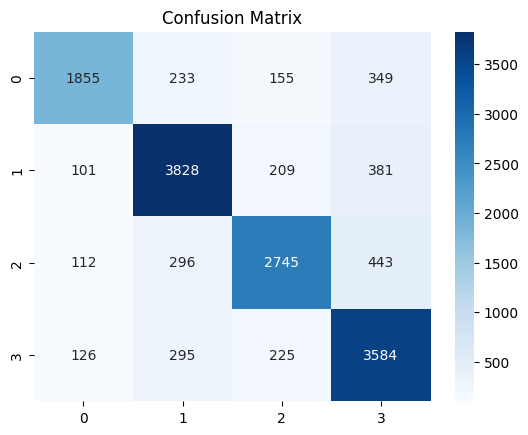

In [109]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [110]:
# Predictions on New Data
new_tweets = [
    "Absolutely fantastic service!", 
    "I hate how bad this was.", 
    "It's neither good nor bad."
]
new_tweets_vec = vectoriser.transform(new_tweets)
predictions = model.predict(new_tweets_vec)

# Output Predictions
for tweet, sentiment in zip(new_tweets, predictions):
    print(f"Tweet: {tweet} -> Sentiment: {sentiment}")

Tweet: Absolutely fantastic service! -> Sentiment: Positive
Tweet: I hate how bad this was. -> Sentiment: Negative
Tweet: It's neither good nor bad. -> Sentiment: Positive
